# **Trabalho 1 - Visualização de Dados**

**Grupo: **Cláudia Rodrigues, Gustavo Oliveira, Matheus Reck, Vinícius Valim

**Proposta:**
Mostrar que é possível ordenar os passageiros por risco de vida com base no acidente ocorrido com o navio de passageiros britânico RMS Titanic, no dia 15 de abril de 1912. Deve-se utilizar apenas recursos baseados em gráficos (comuns na visualização de dados).

**Fundo conceitual:**
Poucos dias após o acidente, um novo navio de mesmo modelo fará uma viagem com mesmo local de partida e mesmo local de destino. Uma seguradora foi contratada para oferecer um seguro individual para os passageiros. Um consultor dessa seguradora solicitou a algumas startups de ciência de dados que elaborassem um modelo que ordene os passageiros do Titanic em ordem de risco de vida e, a partir disso, mostrar quais características são mais discriminates para isso. O consultor quer ver quais são as tais características e um resumo do modelo (com as equações mais relevantes)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import os

import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic.csv


In [2]:
data = pd.read_csv('../input/titanic.csv')                 
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
label_survived = [str(k).replace('1','Sobreviventes').replace('0','Mortos') for k in Counter(data.Survived).keys()] #['Mortos','Sobreviventes']
total_survived = data.Survived.count()
distr_survived = [round(k/total_survived,2) for k in Counter(data.Survived).values()]

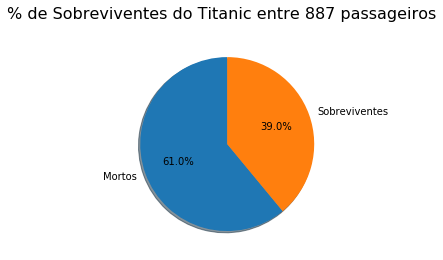

In [4]:
fig1, ax1 = plt.subplots()
fig1.suptitle('% de Sobreviventes do Titanic entre ' + str(total_survived) + ' passageiros', fontsize=16)
ax1.pie(distr_survived, labels=label_survived, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

Percebe-se que tivemos muito mais mortos do que sobreviventes no navio Titanic.

**Perguntas:**

In [5]:
survived = data.loc[data['Survived'] == 1]
died = data.loc[data['Survived'] == 0]



1 - Os passageiros das classes privilegiadas tem mais chances de sobreviver?

In [6]:
label_class_survived = [k for k in Counter(survived.Pclass).keys()]
distr_class_survived = [round(k/survived.Survived.count(),2) for k in Counter(survived.Pclass).values()]
label_class_died = [k for k in Counter(died.Pclass).keys()]
distr_class_died = [round(k/died.Survived.count(),2) for k in Counter(died.Pclass).values()]

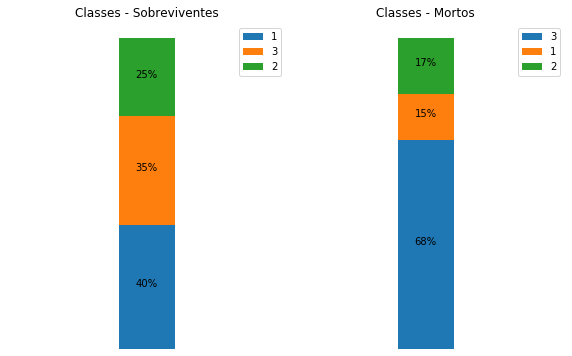

In [7]:
# make figure and assign axis objects
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

xpos = 0
bottom = 0
width = .2

for j in range(len(distr_class_survived)):
    height = distr_class_survived[j]
    ax1.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax1.patches[j].get_height() / 2
    bottom += height
    ax1.text(xpos, ypos, "%d%%" % (ax1.patches[j].get_height() * 100),
             ha='center')

ax1.set_title('Classes - Sobreviventes')
ax1.legend(label_class_survived)
ax1.axis('off')
ax1.set_xlim(- 2.5 * width, 2.5 * width)

xpos = 0
bottom = 0
width = .2

for j in range(len(distr_class_died)):
    height = distr_class_died[j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Classes - Mortos')
ax2.legend(label_class_died)
ax2.axis('off')
ax2.set_xlim( - 2.5 * width, 2.5 * width)

plt.show()

Verificamos que dentre a quantidade de mortos, que possui uma representatividade muito maior (61% dos passageiros), existiu uma forte influência da classe dos passageiros, sendo destes 68% da classe 3.

2 - Existe relação dos casos de sobrevidentes com a sua idade? Caso afirmativo, quais faixas de idade têm mais chance de sobrevivência? <br>

Text(0.5, 1.0, 'Distribuição dos passageiros por idade.')

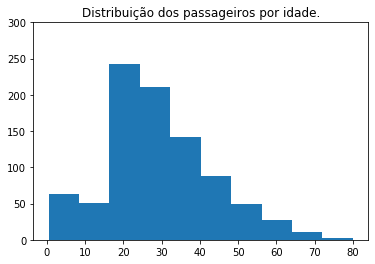

In [8]:
plt.figure()
plt.ylim((None, 300))
H = plt.hist(data.Age)
leg = plt.legend(frameon=False)
plt.title("Distribuição dos passageiros por idade.")

Nota-se que a grande maioria dos passageiros se concentram entre as idades de 20 a 30 anos.

Text(0.5, 1.0, 'Distribuição dos sobreviventes por idade')

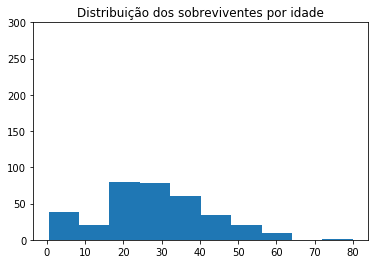

In [9]:
plt.figure()
plt.ylim((None, 300))
H = plt.hist(survived.Age)
leg = plt.legend(frameon=False)
plt.title("Distribuição dos sobreviventes por idade")

In [10]:
survived.Age.describe()

count    342.000000
mean      28.408392
std       14.427863
min        0.420000
25%       19.000000
50%       28.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribuição dos mortos por idade')

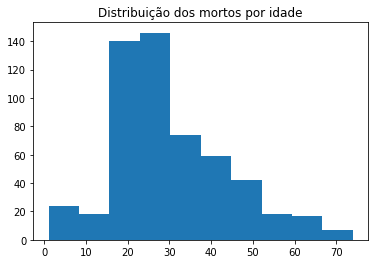

In [11]:
plt.figure()
H = plt.hist(died.Age)
leg = plt.legend(frameon=False)
plt.title("Distribuição dos mortos por idade")

In [12]:
died.Age.describe()

count    545.000000
mean      30.138532
std       13.898317
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

A mediana de idade entre os mortos é de 28 anos.

Coinscidentemente, a mediana de idade entre os sobreviventes também é de 28 anos.

* 3 - Neste tipo de desastre, qual sexo oferece maior risco de vida? <br>

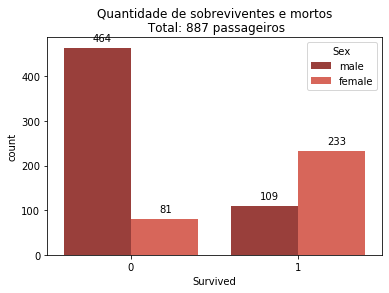

In [13]:
passenger = sns.countplot(data=data, x='Survived', hue='Sex', palette='Reds_d')

for p in passenger.patches:
    b=p.get_bbox()
    passenger.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('Quantidade de sobreviventes e mortos\n Total: %s passageiros' % (data.shape[0]))
plt.show()

Podemos observar que a proporção de homens entre os mortos é muito maior. Da mesma forma, a quantidade de mulheres entre os sobreviventes é consideravelmente maior que a de homens.

In [14]:
le = LabelEncoder()
data['SexNum'] = le.fit_transform(data['Sex'])

In [15]:
distribuicao = data.copy()
distribuicao['Faixa_Idade'] = ''
for i, row in distribuicao.iterrows():
    idade = distribuicao['Age'][i].astype(int)
    if (idade > 80):
        distribuicao['Faixa_Idade'][i] = '80 ou mais'
    else:
        if (idade > 60):
            distribuicao['Faixa_Idade'][i] = '60 a 79'
        else:
            if (idade > 40):
                distribuicao['Faixa_Idade'][i] = '40 a 59'
            else:
                if (idade > 20):
                    distribuicao['Faixa_Idade'][i] = '20 a 39'
                else:
                    if (idade > 10):
                        distribuicao['Faixa_Idade'][i] = '10 a 19'
                    else:
                        distribuicao['Faixa_Idade'][i] = '0 a 9'

distribuicao = distribuicao.drop(['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'SexNum'], axis=1)

In [16]:
distribuicao

,Survived,Name,Sex,Faixa_Idade
0,0,Mr. Owen Harris Braund,male,20 a 39
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,20 a 39
2,1,Miss. Laina Heikkinen,female,20 a 39
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,20 a 39
4,0,Mr. William Henry Allen,male,20 a 39
...,...,...,...,...
882,0,Rev. Juozas Montvila,male,20 a 39
883,1,Miss. Margaret Edith Graham,female,10 a 19
884,0,Miss. Catherine Helen Johnston,female,0 a 9
885,1,Mr. Karl Howell Behr,male,20 a 39


In [17]:
distribuicao.groupby(['Sex','Survived','Faixa_Idade']).count()

Name
Sex    Survived Faixa_Idade      
female 0        0 a 9          16
                10 a 19        16
                20 a 39        37
                40 a 59        11
                60 a 79         1
       1        0 a 9          20
                10 a 19        40
                20 a 39       129
                40 a 59        41
                60 a 79         3
male   0        0 a 9          16
                10 a 19        82
                20 a 39       267
                40 a 59        79
                60 a 79        20
       1        0 a 9          21
                10 a 19        12
                20 a 39        55
                40 a 59        19
                60 a 79         2

In [18]:
label_sex_died = [k for k in Counter(died.Sex).keys()]
distr_sex_died = [round(k/died.Sex.count(),2) for k in Counter(died.Sex).values()]
label_sex_total = [k for k in Counter(data.Sex).keys()]
distr_sex_total = [round(k/data.Sex.count(),2) for k in Counter(data.Sex).values()]
label_sex_survived = [k for k in Counter(survived.Sex).keys()]
distr_sex_survived = [round(k/survived.Sex.count(),2) for k in Counter(survived.Sex).values()]

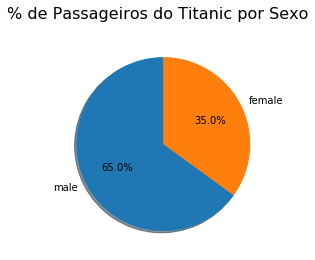

In [19]:
fig1, ax1 = plt.subplots()
fig1.suptitle('% de Passageiros do Titanic por Sexo', fontsize=16)
ax1.pie(distr_sex_total, labels=label_sex_total, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

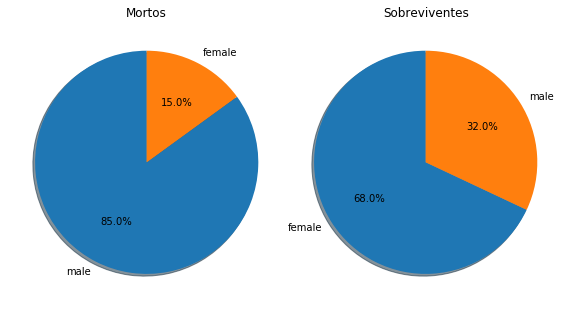

In [20]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

ax1.pie(distr_sex_died, labels=label_sex_died, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Mortos')

ax2.pie(distr_sex_survived, labels=label_sex_survived, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Sobreviventes')

plt.show()

Dos passageiros mortos, tivemos muito mais homens do que mulheres.

4 - Passageiros com parentes a bordo tem mais ou menos chance de se salvar? <br>

Text(0.5, 1.0, 'Distribuição dos mortos com Irmãos ou Cônjuge a bordo.')

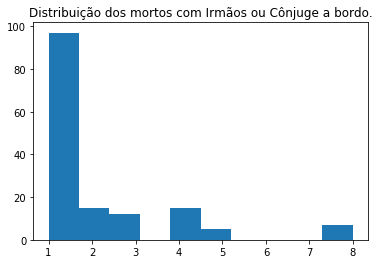

In [21]:
plt.figure()
died_siblings = died[died['Siblings/Spouses Aboard'] > 0]
H = plt.hist(died_siblings['Siblings/Spouses Aboard'])
leg = plt.legend(frameon=False)
plt.title("Distribuição dos mortos com Irmãos ou Cônjuge a bordo.")

A maioria dos passageiros mortos não tinham irmãos ou cônjuges a bordo.

Text(0.5, 1.0, 'Distribuição dos mortos com filhos a bordo.')

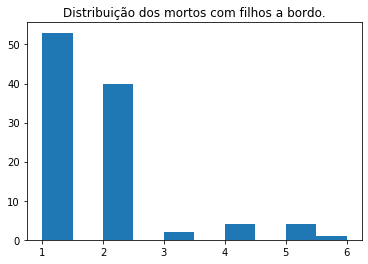

In [22]:
plt.figure()
died_children = died[died['Parents/Children Aboard'] > 0]
H = plt.hist(died_children['Parents/Children Aboard'])
leg = plt.legend(frameon=False)
plt.title("Distribuição dos mortos com filhos a bordo.")

Da mesma forma, entre os mortos a maioria não tinha filhos.

5 - Quanto maior a tarifa paga pelos passageiros, maiores eram as chances de sobrevivência?

Text(0.5, 1.0, 'Distribuição dos mortos por tarifa')

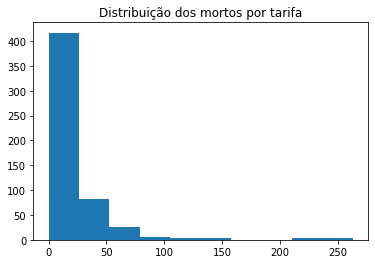

In [23]:
plt.figure()
H = plt.hist(died.Fare)
leg = plt.legend(frameon=False)
plt.title("Distribuição dos mortos por tarifa")

Os passageiros com menores valores de tarifas são os que mais morreram. Isto pode estar associado à classe econômica que acaba também influenciando no local de acomodação no navio.

In [24]:
data['Fare_label'] = ''
for i, row in data.iterrows():
    fare = data['Fare'][i].astype(int)
    if (fare > 100):
        data['Fare_label'][i] = 'Acima de 100'
    else:
        if (fare > 50):
            data['Fare_label'][i] = 'Acima de 50'
        else:
            data['Fare_label'][i] = 'Até 50'

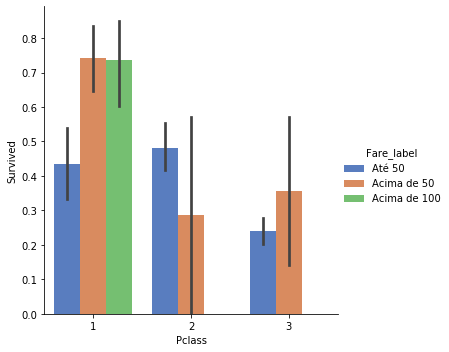

In [25]:
g = sns.factorplot("Pclass", "Survived", "Fare_label", data=data, kind="bar", palette="muted", legend=True)
plt.show()

Aqui vemos claramente que somente os passageiros da Classe 1 possuem tarifas acima de U$100.

Começamos então a montar um modelo em KNN, aplicado sobre as features **Pclass**, **Age**, **Siblings/Spouses Aboard**, **Parents/Children Aboard** e **SexNum** (este último já convertido em 1 - Masculino e 0 - Feminino).

In [26]:
df = data.drop(['Name', 'Sex', 'Fare', 'Fare_label'], axis=1)
df

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,SexNum
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
882,0,2,27.0,0,0,1
883,1,1,19.0,0,0,0
884,0,3,7.0,1,2,0
885,1,1,26.0,0,0,1


In [27]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print('Acurácia de ' + str(accuracy_score(y_test, y_pred)))

Acurácia de 0.7808988764044944


In [32]:
novo_navio = {'Name': ['Gustavo Costa','Cláudia Oliveira','Matheus Reck','Vinícius Valim','Amanda','Guilherme','Derci Gonçalves'],
              'Pclass': [3,3,2,1,1,2,1],
              'Age': [43,34,38,38,36,9,87],
              'Siblings/Spouses Aboard': [1,1,1,0,0,0,0],
              'Parents/Children Aboard': [2,0,0,0,0,0,0],
              'SexNum': [1,0,1,1,0,1,0]
              }

df_novo_navio = pd.DataFrame(novo_navio, columns = ['Name', 'Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'SexNum'])
df_novo_navio

,Name,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,SexNum
0,Gustavo Costa,3,43,1,2,1
1,Cláudia Oliveira,3,34,1,0,0
2,Matheus Reck,2,38,1,0,1
3,Vinícius Valim,1,38,0,0,1
4,Amanda,1,36,0,0,0
5,Guilherme,2,9,0,0,1
6,Derci Gonçalves,1,87,0,0,0


In [33]:
new_X = df_novo_navio.iloc[:,1:].values

In [34]:
new_y = classifier.predict(new_X)
new_y

array([0, 0, 0, 0, 1, 1, 0])

In [35]:
df_novo_navio['Survived'] = new_y
df_novo_navio['Diff Age'] = df_novo_navio['Age']-28
df_novo_navio

,Name,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,SexNum,Survived,Diff Age
0,Gustavo Costa,3,43,1,2,1,0,15
1,Cláudia Oliveira,3,34,1,0,0,0,6
2,Matheus Reck,2,38,1,0,1,0,10
3,Vinícius Valim,1,38,0,0,1,0,10
4,Amanda,1,36,0,0,0,1,8
5,Guilherme,2,9,0,0,1,1,-19
6,Derci Gonçalves,1,87,0,0,0,0,59


Rodamos abaixo um exemplo de ordenação por Risco de Vida, considerando as ordem dos passageiros por Survived (resultante do modelo KNN), Pclass, SexNum, Siblings/Spouses Aboard, Parents/Children Aboard e Diff Age (Diferença da idade para a mediana: 28 anos).

In [36]:
df_novo_navio.sort_values(by=['Survived', 'Pclass', 'SexNum', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Diff Age'], ascending=[0, 1, 0, 1, 1, 0])

,Name,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,SexNum,Survived,Diff Age
4,Amanda,1,36,0,0,0,1,8
5,Guilherme,2,9,0,0,1,1,-19
3,Vinícius Valim,1,38,0,0,1,0,10
6,Derci Gonçalves,1,87,0,0,0,0,59
2,Matheus Reck,2,38,1,0,1,0,10
0,Gustavo Costa,3,43,1,2,1,0,15
1,Cláudia Oliveira,3,34,1,0,0,0,6


Pelo modelo, dá a entender que os parâmetros que mais influenciam na chance de sobreviver são a Classe e quantidade de parentes a bordo.